## Caso Ejemplo: Sistemas de Bomba Simple y Depósitos

_Gustavo Raush, 2019, UPC-MF_

Calcular el punto de funcionamiento de la bomba simple.

Para los cálculos de pérdidas por fricción considerar un $f = 0.02$.

Calcular el punto de trabajo de la bomba (caudal y altura) que impulsa agua a través del sistema presentado en la figura. El desnivel entre depósitos es de 10 m. Las sumatorias de pérdidas tiene una $L_{eq} = 150\, m$, y sección $D = 250\, mm$. Considerar un coeficiente de fricción $f = 0.02$, constante. La ecuación de la bomba tiene una $H_{max} = 30\, m$ y un caudal máximo $Q_{max} = 0.5 \,m^3/s$. Comprobar la solución analítica a través del método gráfico.

![Esquema de Instalación](./sistemaBombaSimple.png)

In [7]:
from math import *
import numpy as np
from math import pi
from scipy.constants import g
from scipy.optimize import fsolve
from numpy import mean
from numpy import arange
from numpy import array
from numpy import linspace
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def _area(d):
    return pi*0.25*d**2
 
def _diam(Q,L,H,f = 0.02):
    return pow(8 * f * L * Q**2/((pi**2) * g * H),1./5.)
 
def _req(d,l,f=0.02):
    return 8 * f * l / (pi**2 * g * d**5)
 
def _Re(Q=1,D=0.1,nu=1e-6):
    return round(4 * Q / (pi * nu * D),0)
 
def _leq(k,d,f=0.02):
    return k * d / f
 
def Q_from_H(H,rh):
    return sqrt(H / rh)
 
def f_From_Moody(Re=1.e6,er=0.0001): # Diagrama de Moody
    if Re < 2300:
        return 64./Re
    elif ((Re >= 2300) and (Re < 4000)):
        return "Transition Zone"
    else:
        f_initial_guess = 0.02
        x_initial_guess = 1 / sqrt(f_initial_guess)
        func = lambda x : x + 2*log10(er / 3.71 + 2.51 * x / Re)
        x_sol = fsolve(func,x_initial_guess)
        return 1 / x_sol[0]**2

### Datos del problema

In [3]:
gamma = 9810 # N/m^3, peso específica del fluido
H = 10 # m , diferencia de cabezas entre reservorios
Leq = 150 # m, Longitud equivalente total de instalación
D = 250.e-3 # m, Dismetro de tubería
Hmax = 30 # m, haltura máxima de bomba
Qmax = 0.5 # m^3/s, caudal máximo de bomba

Coeficiente de fricción constante

In [5]:
f = 0.02

### Solución

La diferencia entre cabezas piezométricas entre depósitos es H y la __Ecuación del Sistema__ es,

$$H_{sys}(Q) = H + r_{eq} Q^2$$

La resistencia hidráulica del sistema de tuberías y tanques, en donde las pérdidas singuares ya fueron añadidas a la longitud real como longitudes equivalentes es:

In [10]:
req = _req(D,Leq)
print('req = %.1f s^2/m^5'% (req))

req = 253.9 s^2/m^5


Definición de la ecuación del sistema

In [11]:
Hsys = lambda q : H + req* q**2

In [12]:
q = linspace(0.0,0.5) # Vector de caudal para graficar la curva del sistema

In [13]:
hs = Hsys(q) # Altura piezometrica del sistema

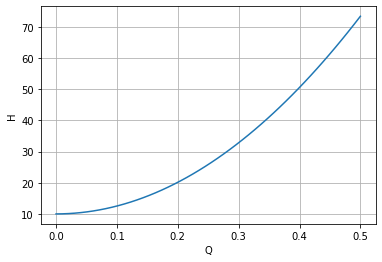

In [14]:
plt.plot(q,hs)
plt.xlabel('Q')
plt.ylabel('H')
plt.grid()
plt.show()


Ecuación de la bomba, versión simplificada, $$H_B(Q) = H_{max}\left[ 1 - \left(\frac{Q}{Q_{max}}\right)^2\right]$$

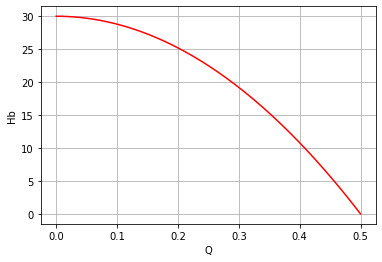

In [15]:
Hpump = lambda q : Hmax*(1-(q/Qmax)**2)
hp = Hpump(q)
plt.plot(q,hp,'r')
plt.grid()
plt.ylabel('Hb')
plt.xlabel('Q')
plt.show()


La solución gráfica del problema es la intersección de ambas curvas

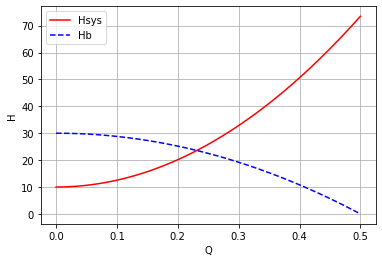

In [16]:
plt.plot(q,hs,'r-',q,hp,'b--')
plt.legend(['Hsys','Hb'])
plt.grid()
plt.xlabel('Q')
plt.ylabel('H')
plt.show()

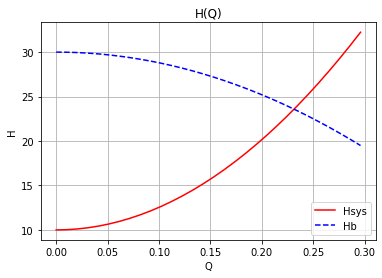

In [26]:
plt.plot(q[0:30],hs[0:30],'r-',q[0:30],hp[0:30],'b--')
plt.legend(['Hsys','Hb'])
plt.grid()
plt.xlabel('Q')
plt.ylabel('H')
plt.title('H(Q)')
plt.show()


Resolviendo el sistema obtenemos el valor exacto del punto de trabajo

$Err_Q$ en la función de error de caudal y que se iguala a cero para conseguir encontrar el valor de $Q_{sol}$, de tal manera que,

$$Err_Q (Q_{sol}) = 0$$

$$Err_Q (Q_{sol}) = H_B(Q) - H_{sys}(Q)$$

$$0 =  H_{max}\left( 1 - \left(\frac{Q} {Q_{max}}\right)^2\right) - \left(H + r_{eq} Q^2 \right)$$ 

Solución

$$Q_{sol} = Qmax \sqrt{\frac{Hmax - Hsys}{Hmax + Qmax^{2} req}}$$

In [18]:
ErrQ = lambda x : Hpump(x) - Hsys(x)

In [24]:
Qsol = fsolve(ErrQ,0.1)[0]
print('Qsol = %.1f m^3/s' % Qsol) 

Qsol = 0.2 m^3/s


El punto de trabajo son las coordenadas de mismo en la gráfica superior $$H_{sol} = H_{B}(Q_{sol})$$

In [23]:
Hsol = Hpump(Qsol)
print('Hsol = %.1f m' % Hsol)

Hsol = 23.6 m


Punto de trabajo del sistema completo, bomba y depósitos:

In [22]:
print('Qsol = %.3f m^3/s\nHsol = %.1f m' % (Qsol,Hsol))

Qsol = 0.231 m^3/s
Hsol = 23.6 m
